# Tucil 2 AI
Author:
- 13521121 Saddam Annais S
- 13521160 Dimas Sakti

## Setup

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 50)

In [49]:
dataset = pd.read_csv("/content/drive/MyDrive/AI/data_train.csv")
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,13,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,16,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,0,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,13,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,2,464,781,565,18,12,9,0,0,1,0


## 1. Statistik dasar (mean, min, max, dll)

In [50]:
dataset.describe().loc[['mean', 'std', 'min', '50%', 'max']].T

,mean,std,min,50%,max
battery_power,1237.145714,430.051785,501.0,1219.0,1998.0
blue,0.493571,0.500137,0.0,0.0,1.0
clock_speed,1.521714,0.814723,0.5,1.5,3.0
dual_sim,0.502857,0.500171,0.0,1.0,1.0
fc,4.275000,4.324170,0.0,3.0,19.0
four_g,0.530000,0.499278,0.0,1.0,1.0
int_memory,31.962143,18.162970,2.0,32.0,64.0
m_dep,0.507857,0.288539,0.1,0.5,1.0
mobile_wt,139.375714,35.400803,80.0,139.0,200.0
n_cores,4.481429,2.279836,1.0,4.0,8.0


- battery power: memiliki rata-rata sekitar 1214 dengan min 501, median 1266, dan max 1995. Selain itu memiliki STD 460.
- bluetooth: modus 0 atau kebanyakan tidak memiliki bluetooth.
- clock speed: memiliki rata-rata sekitar 1.52 dengan min 0.5, median 1.5 dan max 3.0. Selain itu memiliki std 0.819.
- dual sim: memiliki modus 1 atau kebanyakan memiliki dual sim.
- front camera (fc): memiliki rata-rata sekitar 4.39 dengan min 0 atau tidak memiliki front camera, median 3, dan max 18. Selain itu memiliki STD 4.38.
- 4G: memiliki modus 1 atau kebanyakan memiliki 4G.
- internal memory: memiliki rata-rata sekitar 32.24 dengan min 2, median 32, dan max 64. Selain itu memiliki STD 18.1.
- m dep: memiliki rata-rata sekitar 0.4875 dengan min 0.1, median 0.5, dan max 1. Selain itu memiliki STD 0.2875.
- mobile weight: memiliki rata-rata sekitar 142.28 dengan min 80, median 143, dan max 200. Selain itu memiliki STD 35.34.
- n cores: memiliki rata-rata sekitar 4.61 dengan min 1, median 5, dan max 8. Selain itu memiliki STD 2.3.
- primary camera: memiliki rata-rata sekitar 9.915000	dengan min 0.0 atau tidak memiliki primary camera (pc), median 10, dan max 20.0. Selain itu memiliki STD 6.03.
- px height: memiliki rata-rata sekitar 649.61 dengan min 0.0, median 576.5, dan max 1901. Selain itu memiliki STD 442.
- px width: memiliki rata-rata sekitar 1251 dengan min 500, median 1249, dan max 1995. Selain itu memiliki STD 439.9.
- ram: memiliki rata-rata sekitar 2165 dengan min 258, median 2286, dan max 3991. Selain itu memiliki STD 1099.
- sc h: memiliki rata-rata sekitar 12.35 dengan min 5, median 12, dan max 19. Selain itu memiliki STD 4.23.
- sc w: memiliki rata-rata sekitar 6 dengan min 0, median 5, dan max 18. Selain itu memiliki STD 4.31.
- talk time: memiliki rata-rata sekitar 10.93 dengan min 2, median 11, dan max 20. Selain itu memiliki STD 5.61.
- 3G: memiliki modus 1 atau kebanyakan memiliki 3G.
- touch screen: memiliki modus 1 atau kebanyakan memiliki touch screen.
- wifi: memiliki modus 1 atau kebanyakan memiliki wifi.
- price range: memiliki rata-rata sekitar 1.55 dengan min 0, median 2, dan max 3. Selain itu memiliki STD 1.119.

## 2. *Duplicate value*

In [51]:
duplicate_count = dataset.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

Jumlah data duplikat: 0


Jumlah *duplicate value* yang ditemukan adalah 0

## 3. *Missing value*

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

Dataset memiliki 600 row dan semua atribut tidak memiliki value yang hilang. Semua terisi dengan tipe data yang tepat

## 4. *Outlier*

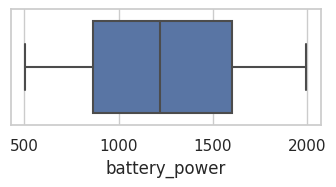

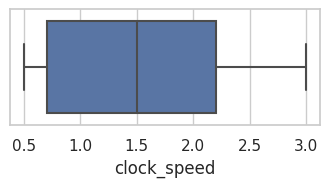

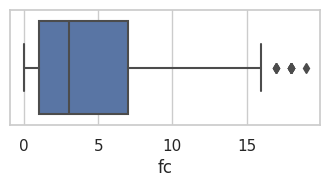

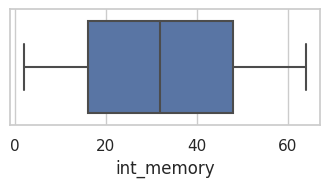

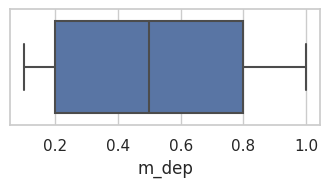

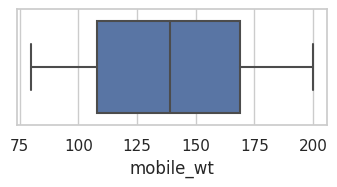

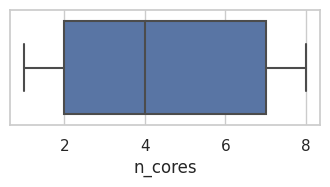

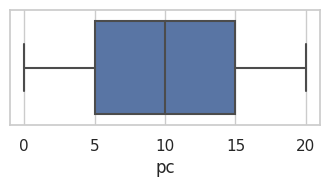

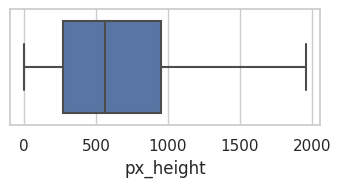

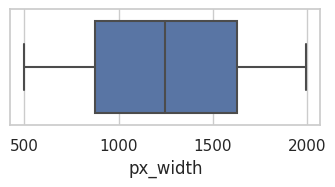

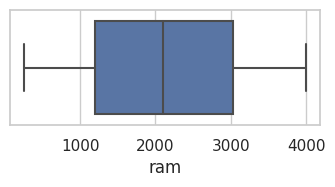

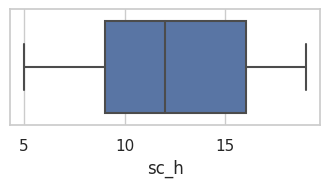

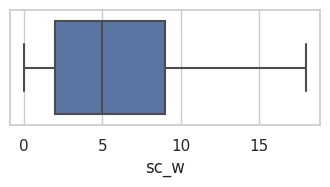

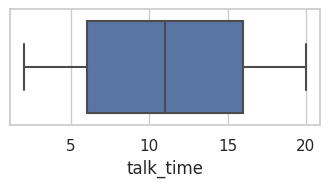

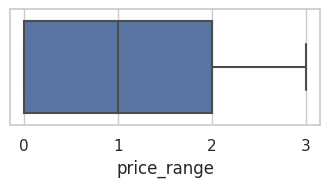

In [53]:
numeric_columns = [col for col in dataset.columns if dataset[col].dtype in ['int64', 'float64'] and not dataset[col].isin([0, 1]).all()]

for column in numeric_columns:
    plt.figure(figsize=(4, 1.5))
    sns.boxplot(x=column, data=dataset)
    plt.show()

*Outlier* ditemukan pada beberapa kolom saja seperti fc yang memiliki 2 *outliter* yang melebihi nilai maksimum dan px_height yang memiliki 1 *outlier* yang melebihi nilai maksimum. *Outlier* ini nantinya dapat dihilangkan untuk membersihkan data sebelum diolah.

## 5. (Non numerik) Bar Chart

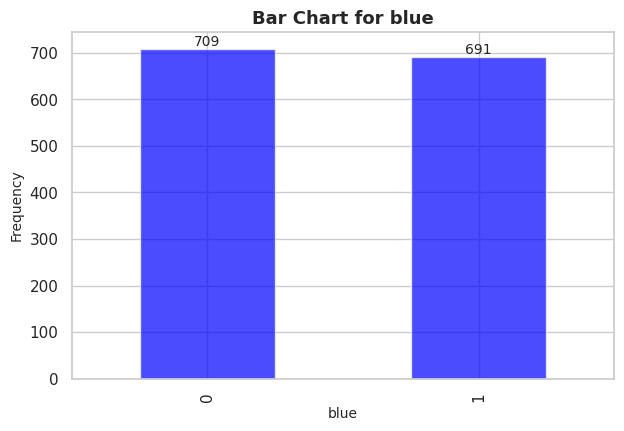

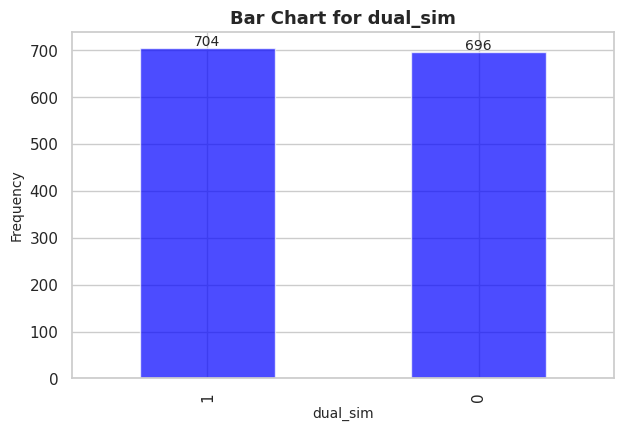

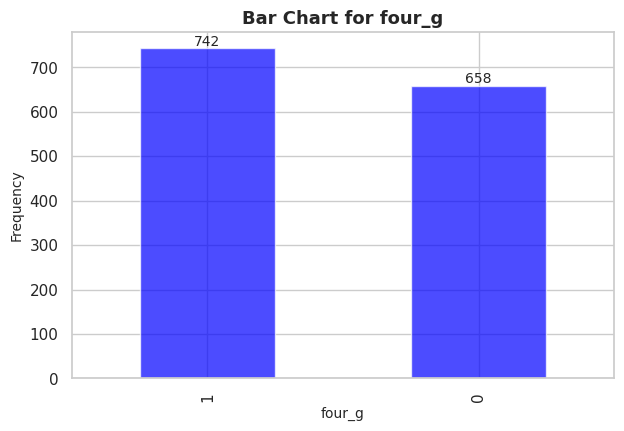

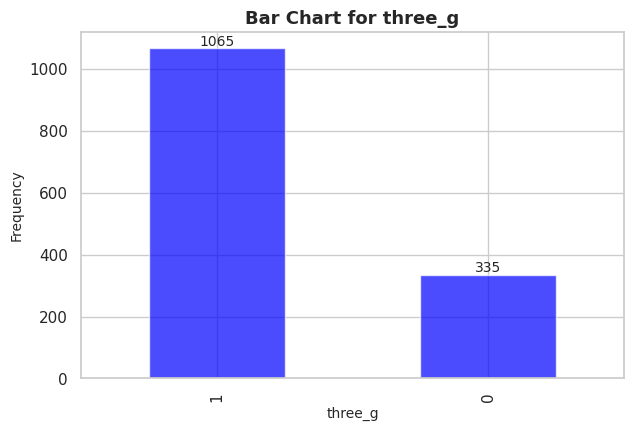

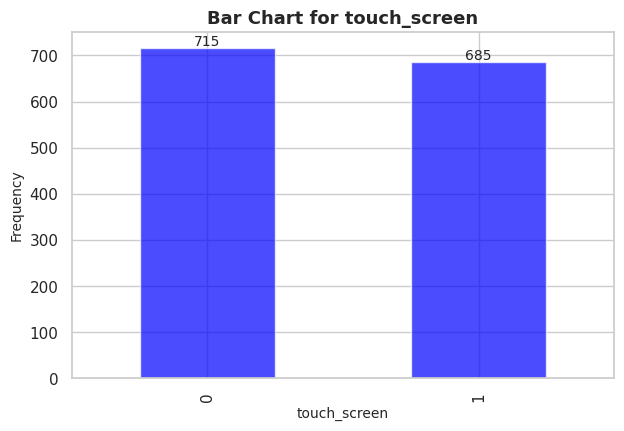

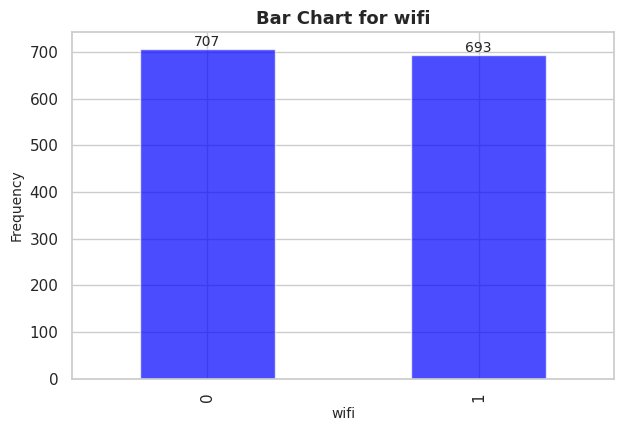

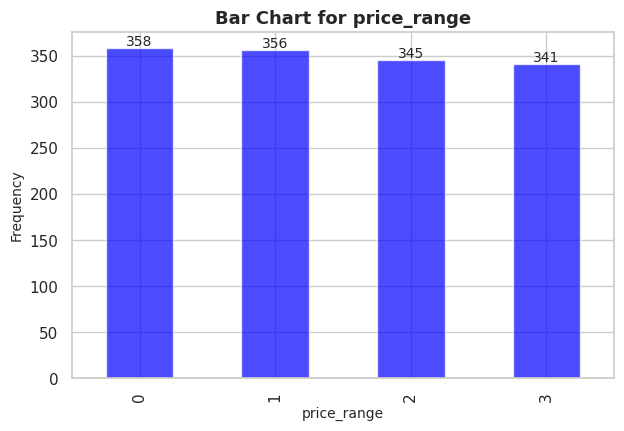

In [54]:
non_numeric_columns = [col for col in dataset.columns if dataset[col].isin([0, 1]).all()]

non_numeric_columns.append('price_range')

for col in non_numeric_columns:
    plt.figure(figsize=(7, 4.5))

    ax = dataset[col].value_counts().plot(kind='bar', color='blue', alpha=0.7)

    plt.title(f'Bar Chart for {col}', fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

    plt.show()

- blue : Kolom blue memiliki frekuensi yang relatif sama yaitu 301 ponsel tidak memiliki bluetooth dan 299 ponsel memiliki bluetooth.

- dual_sim : Pada kolom dual_sim, 315 ponsel memiliki dual sim dan 285 tidak ponsel memiliki dual sim, jadi ponsel yang memiliki dual sim lebih banyak dibanding yang tidak memiliki.

- four_g : Kolom four_g memiliki frekuensi yang relatif sama yaitu 301 ponsel memiliki fitur 4G dan 299 ponsel tidak memiliki 4G.

- three_g : Pada kolom three_g, mayoritas ponsel memiliki 3G yaitu sejumlah 458 ponsel memiliki 3G, sedangkan yang tidak memiliki hanya berjumlah 142 ponsel.

- touch_screen : Pada kolom dual_sim, 321 ponsel memiliki touch screen  dan 279 tidak ponsel memiliki touch screen, jadi ponsel yang memiliki touch screen lebih banyak dibanding yang tidak memiliki.

- wifi : Pada kolom wifi, 321 ponsel memiliki wifi  dan 279 tidak ponsel memiliki wifi, jadi ponsel yang memiliki wifi lebih banyak dibanding yang tidak memiliki.

- price_range : Pada kolom price_range, distribusi tiap nilainya cukup merata, namun paling banyak didominasi oleh 3 (ponsel dengan biaya sangat tinggi) dengan jumlah 159, diikuti oleh  2 (biaya tinggi) dengan jumlah 155, 1 (biaya sedang) dengan jumlah 144, lalu 0 (biaya rendah) dengan jumlah 142.  


## 5. (Numerik) Plot histogram dan kurtosis

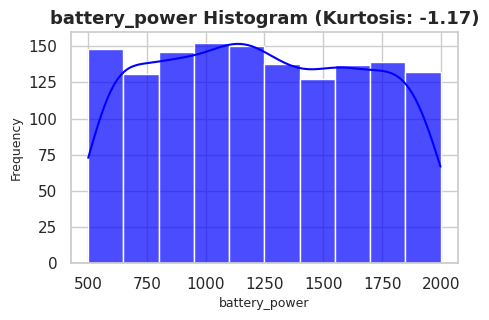

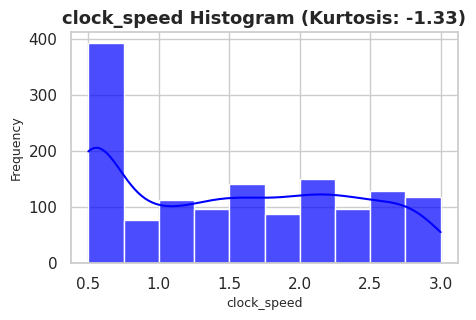

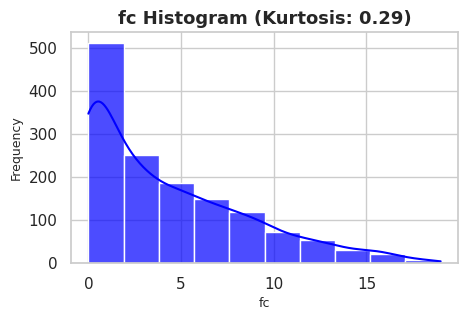

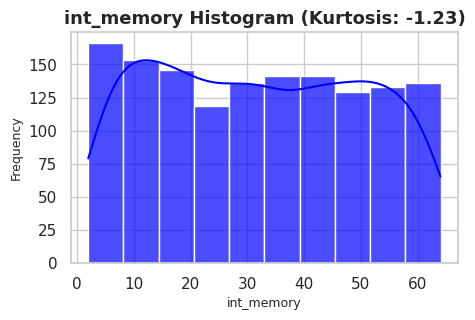

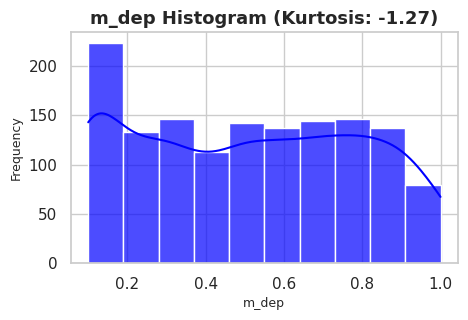

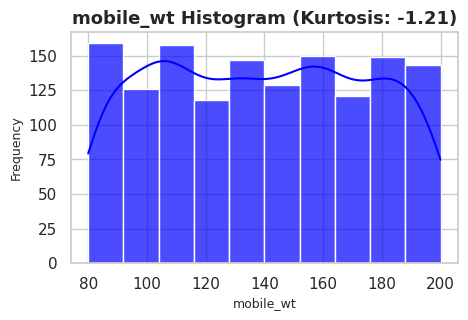

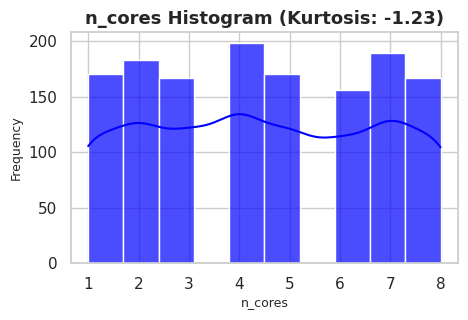

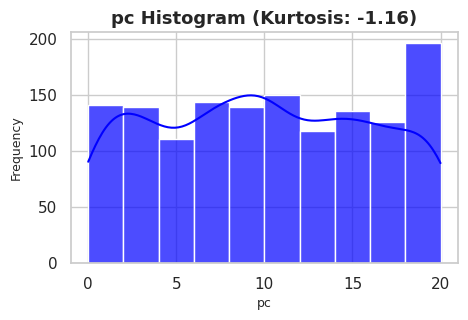

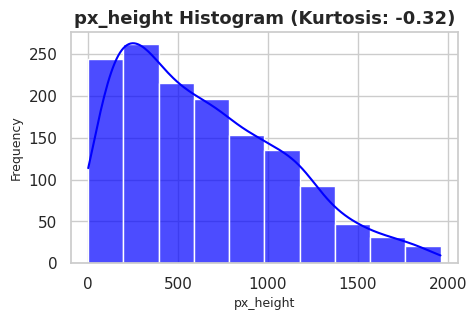

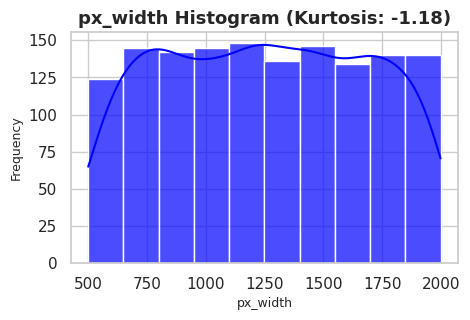

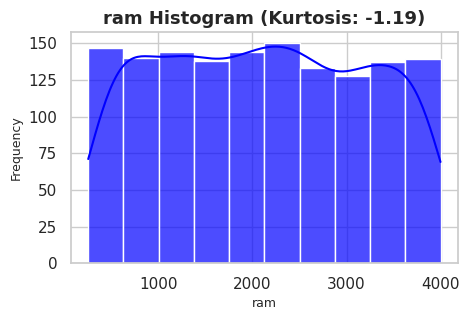

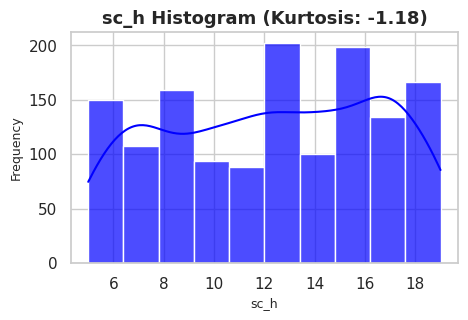

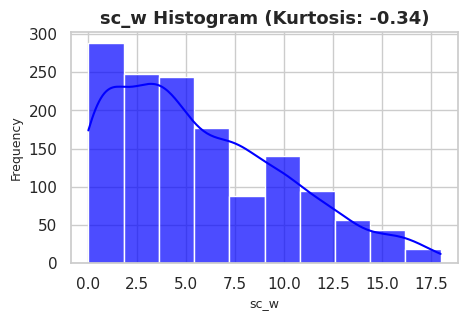

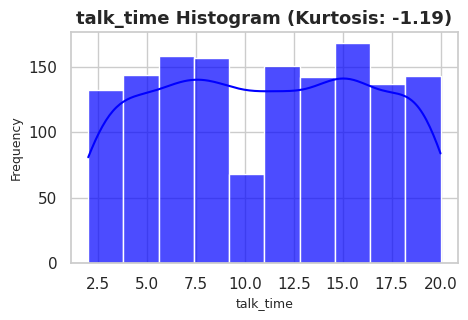

In [55]:
numeric_columns = [col for col in dataset.columns if not dataset[col].isin([0, 1]).all()]
numeric_columns.remove('price_range')
num_bins = 10

for col in numeric_columns:
    plt.figure(figsize=(5, 3))

    # Create the histogram for the current column
    sns.histplot(dataset[col], kde=True, bins=num_bins, color='blue', alpha=0.7)

    # Calculate kurtosis
    kurt = kurtosis(dataset[col])

    # Set the chart title and axes labels
    plt.title(f'{col} Histogram (Kurtosis: {kurt:.2f})', fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)

    # Display the chart
    plt.show()

- battery_power: tidak berdistribusi normal dan merupakan platikurtik.
- clock_speed: tidak berdistribusi normal dan merupakan platikurtik.
- fc: terlihat distribusi normal dengan positive skewness yang eksrim serta merupakan platikurtik.
- int_memory: terlihat distribusi normal dan merupakan platikurtik.
- m_dep: tidak terlihat distribusi normal dan merupakan platikurtik.
- mobile_wt: tidak terlihat distribusi normal dan merupakan platikurtik.
- n_cores: tidak terlihat distribusi normal dan merupakan platikurtik.
- pc: tidak terlihat distribusi normal dan merupakan platikurtik.
- px_height: terlihat distribusi normal dengan positive skewness yang eksrim serta merupakan platikurtik.
- pc: tidak terlihat distribusi normal dan merupakan platikurtik.
- ram: tidak terlihat distribusi normal dan merupakan platikurtik.
- sc_h: tidak terlihat distribusi normal dan merupakan platikurtik.
- sc_w: terlihat distribusi normal dengan positive skewness yang eksrim serta merupakan platikurtik.
- talk_time: tidak terlihat distribusi normal dan merupakan platikurtik.

## 6. Korelasi dengan kolom target

### Kolom numerik

Kolom: ram, F-Statistic: 2508.99, p-value: 0.0000
Kolom: battery_power, F-Statistic: 19.92, p-value: 0.0000
Kolom: px_width, F-Statistic: 18.16, p-value: 0.0000
Kolom: px_height, F-Statistic: 15.90, p-value: 0.0000
Kolom: mobile_wt, F-Statistic: 4.82, p-value: 0.0024
Kolom: int_memory, F-Statistic: 3.22, p-value: 0.0219
Kolom: sc_h, F-Statistic: 2.20, p-value: 0.0859
Kolom: sc_w, F-Statistic: 1.53, p-value: 0.2058
Kolom: n_cores, F-Statistic: 1.21, p-value: 0.3031
Kolom: m_dep, F-Statistic: 0.94, p-value: 0.4192
Kolom: talk_time, F-Statistic: 0.90, p-value: 0.4429
Kolom: clock_speed, F-Statistic: 0.12, p-value: 0.9473
Kolom: pc, F-Statistic: 0.12, p-value: 0.9476
Kolom: fc, F-Statistic: 0.05, p-value: 0.9845


<ipython-input-56-6777247fa97b>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


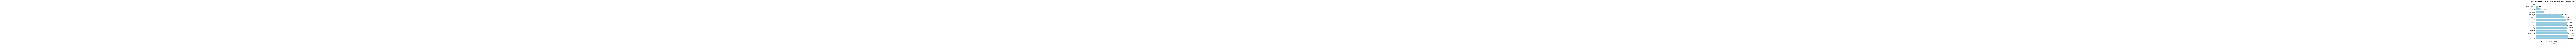

In [56]:
numeric_columns = [col for col in dataset.columns if not dataset[col].isin([0, 1]).all()]
numeric_columns.remove('price_range')

anova_results = {}
for col in numeric_columns:
    groups = [dataset[dataset['price_range'] == i][col] for i in range(4)]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[col] = (f_statistic, p_value)

sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1][1])

for col, (f_statistic, p_value) in sorted_anova_results:
    print(f"Kolom: {col}, F-Statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(121)
columns = [col for col, _ in sorted_anova_results]
p_values = [p_value for _, (_, p_value) in sorted_anova_results]
sns.barplot(x=p_values, y=columns, color='#87CEEB')
plt.title('Hasil ANOVA untuk Kolom Numerik (p-value)', fontsize=16, fontweight='bold')
plt.xlabel('p-value', fontsize=12)
plt.ylabel('Kolom Numerik', fontsize=12)
plt.xscale('log')

for i, v in enumerate(p_values):
    plt.text(v, i, f'p={v:.4f}', fontsize=10, va='center', color='black')

plt.tight_layout()
plt.show()

 Nilai p-value dihasilkan oleh uji ANOVA digunakan mengukur signifikansi statistik dari perbedaan rata-rata antara kelompok. Semakin kecil nilai p-value, semakin signifikan perbedaan tersebut. Pada analisis ini, kami tetapkan bahwa jika p-value kurang dari ambang signifikansi yang telah ditentukan (0.05), maka dapat disiimpulkan bahwa ada korelasi yang signifikan antara kolom numerik dan kolom target.

### Kolom non numerik


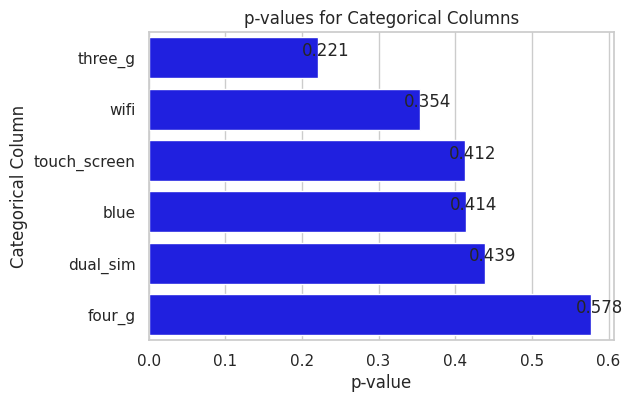

In [57]:
categorical_columns = [col for col in dataset.columns if dataset[col].isin([0, 1]).all()]
p_values = []

for column in categorical_columns:
  contingency_table = pd.crosstab(dataset[column], dataset['price_range'])
  chi2, p_value, _, _ = chi2_contingency(contingency_table)
  p_values.append(p_value)

data = pd.DataFrame({'Categorical Column': categorical_columns, 'p-value': p_values})
data = data.sort_values('p-value')

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='p-value', y='Categorical Column', data=data, color='blue')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'), (p.get_width() + 0.01, p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('p-value')
plt.ylabel('Categorical Column')
plt.title('p-values for Categorical Columns')

plt.show()

p value merupakan cara untuk mengetahui apakah suatu data berpengaruh atau tidak ke data yang lain. Disini kami menggunakan chi square hypothesis testing untuk mencari nilai p values tersebut karena kolom-kolom yang kami bandingkan mmerupakan kolom kategorikal. Kami menggunakan alpha sebesar 0.05 sehingga jika p values < alpha maka berarti kolom terbukti memiliki pengaruh yang signifikan terhadap kolom target. Sedangkankan jika p value >= maka berarti kolom tersebut tidak terbukti memiliki pengaruh yang signifikan terhadap kolom target.

Satu-satunya kolom yang memiliki p value < alpha adalah kolom three_g. Kolom tersebut memiliki p value 0.034 < alpha sehingga memiliki pengaruh yang signifikan dengan kolom target.

## Naive Bayes

In [59]:
# Making it into feat and target
x = dataset.copy().drop(['price_range'], axis=1)
y = dataset['price_range']

# Getting the column name
cols_to_bin = [col for col in dataset.columns if not dataset[col].isin([0, 1]).all()]
cols_to_bin.remove('price_range')

# Creating bins using qcut, it will save the info of the cut
def create_bins(dataset, num_bins, cols_to_bin):
    dataset = dataset.copy()
    binning_info = {}

    for column in cols_to_bin:

        # Compute bin ranges
        bins = pd.cut(dataset[column], bins=num_bins, retbins=True, labels=False)

        # Update binning information
        binning_info[column] = {
            'bin_edges': bins[1]
        }

        # Replace column values with bin labels
        dataset[column] = bins[0]

    return dataset, binning_info

# Convert function for new data
def convert_to_bin(data, binning_info):
    for column, info in binning_info.items():
        bin_edges = info['bin_edges']
        data[column] = pd.cut(data[column], bins=bin_edges, labels=False)

    return data

binned_data, binning_info = create_bins(x, 4, cols_to_bin)

In [60]:
correlation_matrix = binned_data.corr()

# Menentukan kolom dengan korelasi kuat
strong_correlation_threshold = 0.5  # Ubah ambang sesuai kebutuhan

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) >= strong_correlation_threshold:
            strong_correlations.append((col1, col2, correlation))

# Menampilkan kolom dengan korelasi kuat
print("Strong Correlations:")
for col1, col2, correlation in strong_correlations:
    print(f"{col1} - {col2}: {correlation}")

Strong Correlations:
fc - pc: 0.5778665847796204
four_g - three_g: 0.5955752002886632


In [61]:
cols_to_drop = ['fc', 'four_g']  # Kolom yang ingin dihapus
binned_data = binned_data.drop(cols_to_drop, axis=1)

In [62]:
binned_data.head()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1,0,1,2,3,0,0,2,1,0,1,1,1,1,1,0,0
1,1,0,2,0,0,2,1,2,3,0,1,2,3,0,0,1,0,0
2,2,1,2,1,2,1,0,1,0,0,0,2,3,3,0,1,0,1
3,1,0,1,0,3,1,3,0,2,1,2,1,0,0,0,1,1,1
4,0,0,0,1,3,2,2,1,0,0,0,0,3,2,1,0,0,1


In [63]:
def calculate_probabilities(feature_dataset, target_dataset, alpha=1):
    probabilities = {}

    # Calculate prior probabilities for each target class
    target_classes = target_dataset.unique()
    total_count = len(target_dataset)
    prior_probabilities = {target_class: (len(target_dataset[target_dataset == target_class]) + alpha) / (total_count + alpha * len(target_classes)) for target_class in target_classes}
    probabilities['prior_probability'] = prior_probabilities

    # Iterate over each feature column
    for feature_column in feature_dataset.columns:
        probabilities[feature_column] = {}

        # Get unique classes for the current feature column
        feature_classes = feature_dataset[feature_column].unique()

        # Iterate over each target class
        for target_class in target_classes:
            probabilities[feature_column][target_class] = {}

            # Calculate the probability of each feature class given the target class
            for feature_class in feature_classes:
                class_count = len(feature_dataset[(feature_dataset[feature_column] == feature_class) & (target_dataset == target_class)])
                total_count = len(target_dataset[target_dataset == target_class])
                probability = (class_count + alpha) / (total_count + alpha * len(feature_classes))
                probabilities[feature_column][target_class][feature_class] = probability

    return probabilities


In [64]:
probability = calculate_probabilities(binned_data, y)

In [65]:
probability

{'prior_probability': {1: 0.25427350427350426,
  2: 0.24643874643874644,
  0: 0.2556980056980057,
  3: 0.24358974358974358},
 'battery_power': {1: {0: 0.24166666666666667,
   1: 0.275,
   2: 0.25,
   3: 0.23333333333333334},
  2: {0: 0.2808022922636103,
   1: 0.24355300859598855,
   2: 0.23782234957020057,
   3: 0.23782234957020057},
  0: {0: 0.3259668508287293,
   1: 0.3314917127071823,
   2: 0.19613259668508287,
   3: 0.1464088397790055},
  3: {0: 0.17391304347826086,
   1: 0.19710144927536233,
   2: 0.30144927536231886,
   3: 0.32753623188405795}},
 'blue': {1: {1: 0.4720670391061452, 0: 0.5279329608938548},
  2: {1: 0.5014409221902018, 0: 0.49855907780979825},
  0: {1: 0.475, 0: 0.525},
  3: {1: 0.5276967930029155, 0: 0.47230320699708456}},
 'clock_speed': {1: {0: 0.39444444444444443,
   2: 0.2,
   1: 0.20555555555555555,
   3: 0.2},
  2: {0: 0.37822349570200575,
   2: 0.20630372492836677,
   1: 0.21203438395415472,
   3: 0.2034383954154728},
  0: {0: 0.4116022099447514,
   2: 0.20

In [66]:
def predict(dataset, probabilities):
    predictions = []

    for _, row in dataset.iterrows():
        posterior_probs = {target_class: probabilities['prior_probability'][target_class] for target_class in probabilities['prior_probability']}

        for feature_col in dataset.columns:
            for target_class in probabilities[feature_col]:
                posterior_probs[target_class] *= probabilities[feature_col][target_class][row[feature_col]]

        predicted_class = max(posterior_probs, key=posterior_probs.get)
        predictions.append(predicted_class)

    return predictions

def calc_accuracy(actual_target, predicted_target):
    correct = sum(1 for actual, predicted in zip(actual_target, predicted_target) if actual == predicted)
    total = len(actual_target)
    accuracy = correct / total
    return accuracy

In [67]:
datasetVal = pd.read_csv("/content/drive/MyDrive/AI/data_validation.csv")

cols_to_bin_val = [col for col in dataset.columns if not dataset[col].isin([0, 1]).all() and col not in cols_to_drop]
cols_to_bin_val.remove('price_range')

binned_data_val = convert_to_bin(datasetVal, binning_info)
binned_data_val = binned_data_val.drop(['price_range'] + cols_to_drop, axis=1)
binned_data_val

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,0,2,0,0,2,3,0,0,0,0,2,1,1,3,0,0,1
1,0,1,0,1,2,3,2,2,1,2,3,2,1,0,1,1,1,0
2,0,1,3,1,0,0,3,2,0,0,0,3,0,0,1,0,0,0
3,0,0,0,0,2,2,2,0,3,1,3,0,3,3,1,1,1,1
4,0,0,0,1,1,0,1,1,3,0,0,3,1,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2,1,3,0,3,1,1,0,0,0,1,1,1,0,3,0,1,1
596,3,0,2,0,2,3,1,3,3,0,0,3,3,1,3,1,1,0
597,0,1,3,1,1,0,3,1,0,1,3,0,0,0,0,1,1,1
598,3,1,3,1,2,0,3,1,0,1,3,1,1,2,3,1,1,1


In [68]:
predicted_values = predict(binned_data_val, probability)

In [69]:
accuracyScore = calc_accuracy(datasetVal['price_range'], predicted_values)
accuracyScore

0.76